# Customer Purchase Data Analysis — Python EDA


## Objective
To analyze customer purchase behavior using Python by performing data cleaning and exploratory data analysis (EDA) to identify key factors influencing purchase decisions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
df = pd.read_excel("C:\\Users\\sniks\\OneDrive\\Desktop\\customer-purchase-analysis-and-dashboard\\bike_buyers_analysis.xlsx",sheet_name="Raw_Data")
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


## Dataset Overview
- Total records: 1000
- Target variable: Purchased Bike
- Data includes demographic, income, commute, and regional attributes


In [4]:
df.shape

(1000, 13)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [6]:
df.describe(include="all")


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
count,1000.000000,993,989,994.000000,992.000000,1000,1000,996,991.000000,1000,1000,992.000000,1000
unique,NaN,2,2,NaN,NaN,5,5,2,NaN,5,3,NaN,2
top,NaN,Married,Male,NaN,NaN,Bachelors,Professional,Yes,NaN,0-1 Miles,North America,NaN,No
freq,NaN,535,500,NaN,NaN,306,276,682,NaN,366,508,NaN,519
mean,19965.992000,NaN,NaN,56267.605634,1.910282,NaN,NaN,NaN,1.455096,NaN,NaN,44.181452,NaN
std,5347.333948,NaN,NaN,31067.817462,1.626910,NaN,NaN,NaN,1.121755,NaN,NaN,11.362007,NaN
min,11000.000000,NaN,NaN,10000.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,25.000000,NaN
25%,15290.750000,NaN,NaN,30000.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,35.000000,NaN
50%,19744.000000,NaN,NaN,60000.000000,2.000000,NaN,NaN,NaN,1.000000,NaN,NaN,43.000000,NaN
75%,24470.750000,NaN,NaN,70000.000000,3.000000,NaN,NaN,NaN,2.000000,NaN,NaN,52.000000,NaN


In [7]:
df.duplicated().sum()


np.int64(0)

In [10]:
df.isnull().sum()


ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [11]:
categorical_cols = df.select_dtypes(include="object").columns

df[categorical_cols] = df[categorical_cols].fillna("Unknown")


In [13]:
numeric_cols = df.select_dtypes(include="number").columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [14]:
df.isnull().sum()


ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [15]:
for col in categorical_cols:
    df[col] = df[col].str.strip().str.title()


In [16]:
bins = [0, 25, 35, 50, 100]
labels = ["Under 25", "25–35", "36–50", "50+"]

df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)


In [18]:
df["Income_Group"] = pd.qcut(df["Income"], q=4, labels=["Low", "Medium", "High", "Very High"])


## Data Cleaning Steps
- Removed duplicate records
- Handled missing values:
  - Categorical columns filled with "Unknown"
  - Numerical columns filled using mean imputation
- Standardized categorical text values
- Created derived features:
  - Age Group
  - Income Group


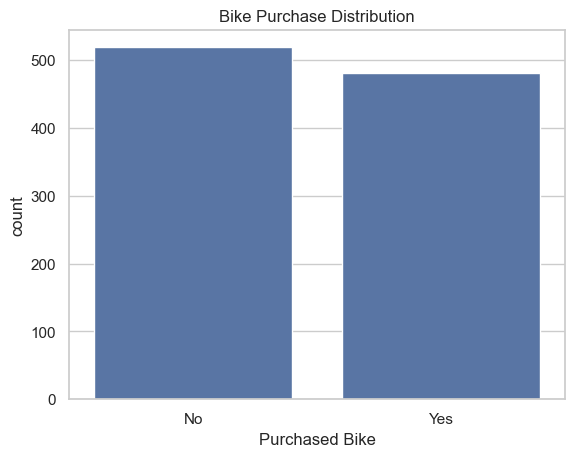

In [19]:
df["Purchased Bike"].value_counts()
plt.figure()
sns.countplot(x="Purchased Bike", data=df)
plt.title("Bike Purchase Distribution")
plt.show()


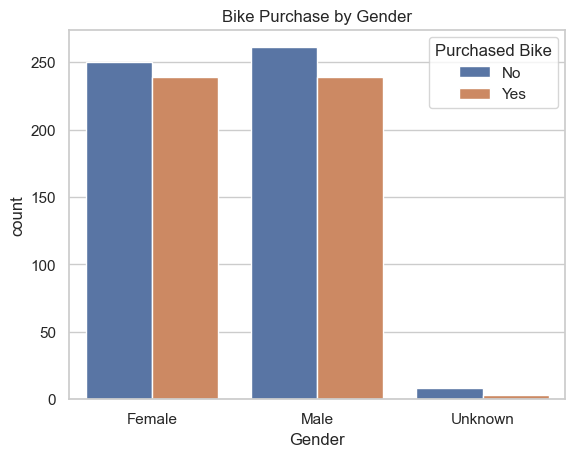

In [20]:
plt.figure()
sns.countplot(x="Gender", hue="Purchased Bike", data=df)
plt.title("Bike Purchase by Gender")
plt.show()


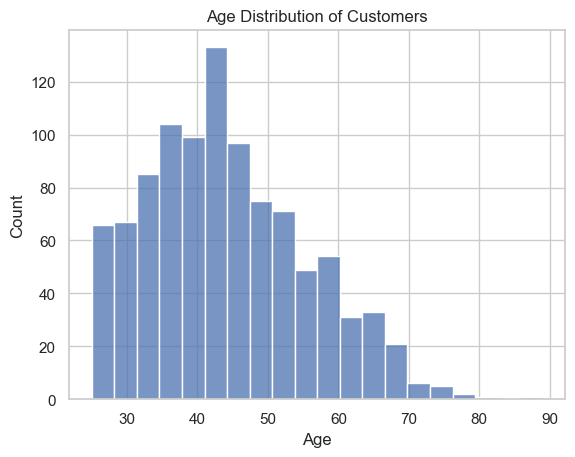

In [21]:
plt.figure()
sns.histplot(df["Age"], bins=20)
plt.title("Age Distribution of Customers")
plt.show()


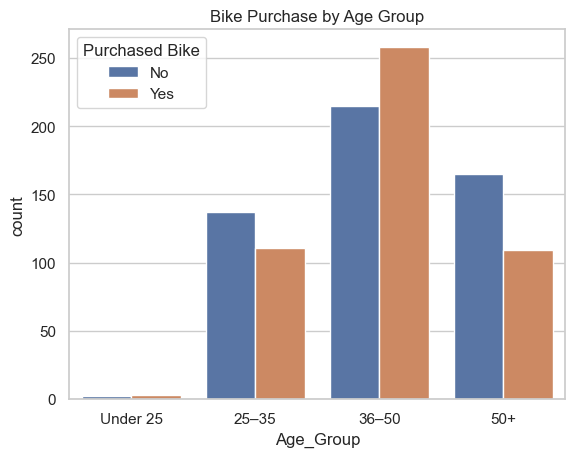

In [22]:
plt.figure()
sns.countplot(x="Age_Group", hue="Purchased Bike", data=df)
plt.title("Bike Purchase by Age Group")
plt.show()


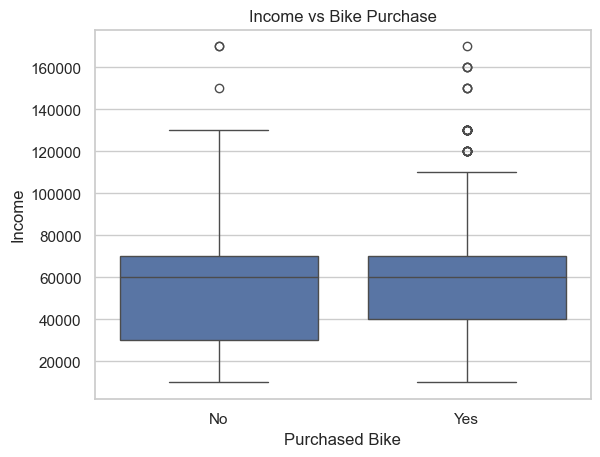

In [23]:
plt.figure()
sns.boxplot(x="Purchased Bike", y="Income", data=df)
plt.title("Income vs Bike Purchase")
plt.show()


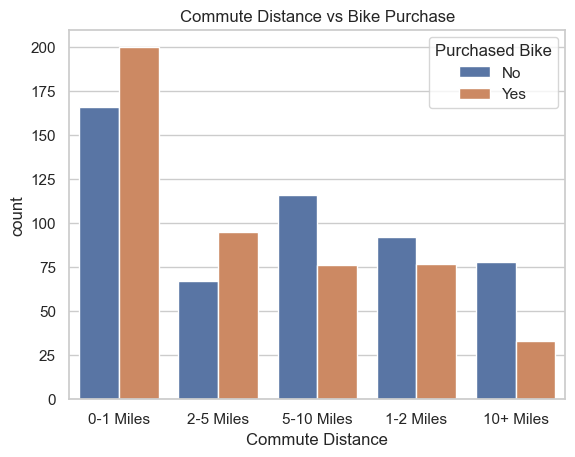

In [24]:
plt.figure()
sns.countplot(x="Commute Distance", hue="Purchased Bike", data=df)
plt.title("Commute Distance vs Bike Purchase")
plt.show()


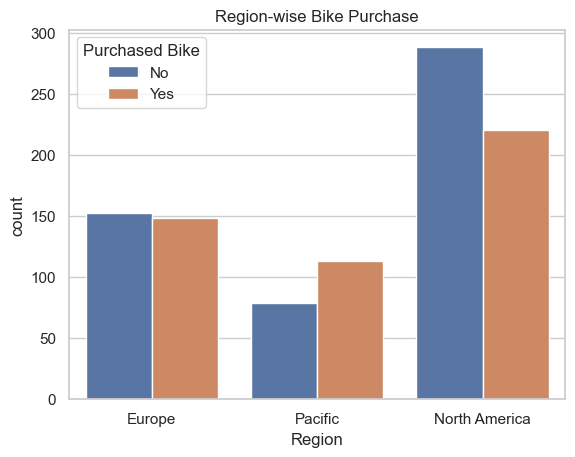

In [25]:
plt.figure()
sns.countplot(x="Region", hue="Purchased Bike", data=df)
plt.title("Region-wise Bike Purchase")
plt.show()


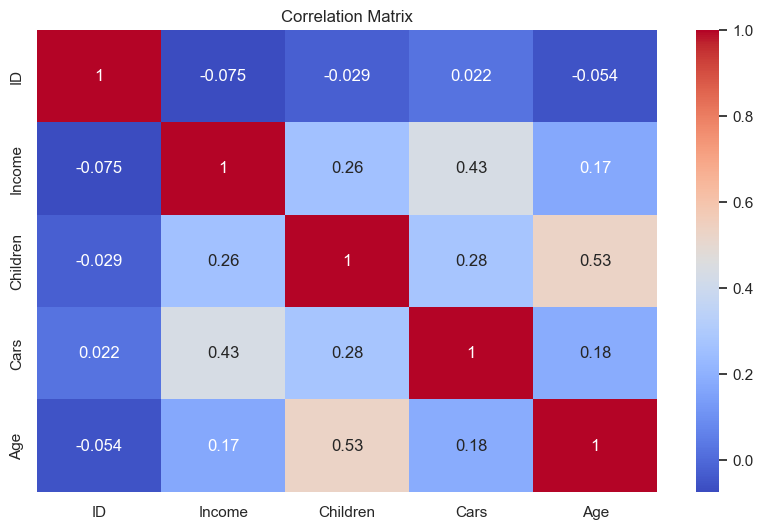

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [27]:
total_customers = df.shape[0]
buyers = df[df["Purchased Bike"] == "Yes"].shape[0]
purchase_rate = buyers / total_customers

print("Total Customers:", total_customers)
print("Bike Buyers:", buyers)
print("Purchase Rate:", round(purchase_rate * 100, 2), "%")


Total Customers: 1000
Bike Buyers: 481
Purchase Rate: 48.1 %


## EDA Insights

- Customers with higher income show a greater likelihood of purchasing bikes
- Age group 30–50 contributes the highest number of bike purchases
- Shorter commute distances correlate with higher purchase rates
- Purchase behavior varies across regions, indicating geographic influence
